# Demostration

In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor


SEED = 42
np.random.seed(SEED)
%matplotlib inline

## Decision Tree 

In [6]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import datasets


data = datasets.load_wine()

df = pd.DataFrame(data['data'], columns = data.feature_names)
y = np.array(data.target)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [7]:
model = DecisionTreeClassifier()
model.fit(df, y)

DecisionTreeClassifier()

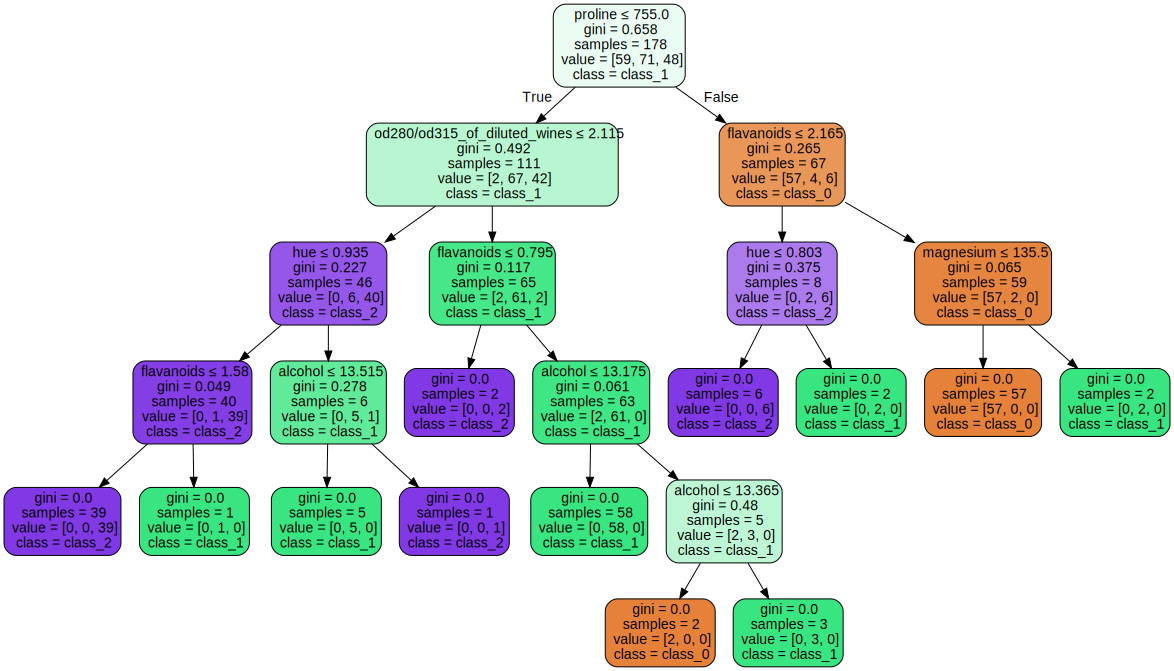

In [8]:
import graphviz 


dot_data = export_graphviz(model, out_file=None, 
                         feature_names=data.feature_names,  
                         class_names=data.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

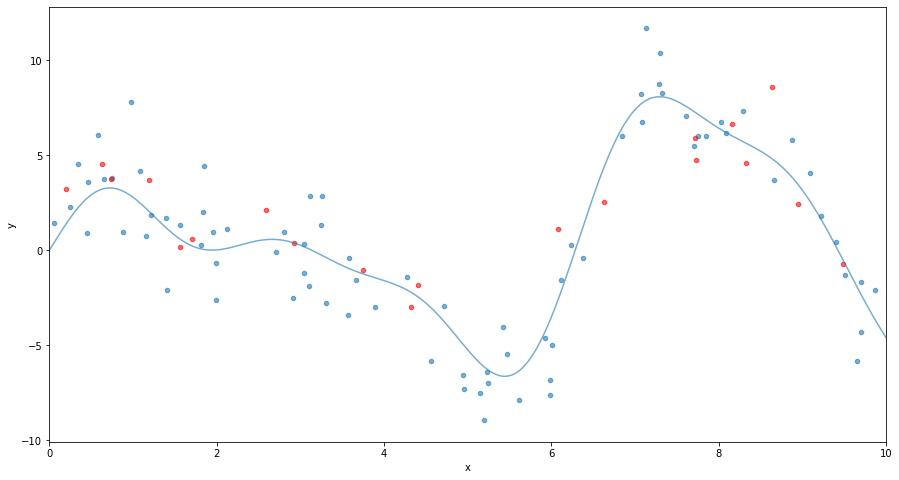

In [2]:
ground_truth = lambda x: x*np.sin(x) + 2 * np.sin(2*x) + np.sin(3*x)

def sample_data(n_samples=200):
    """generate training and testing data"""
    np.random.seed(SEED)
    X = np.random.uniform(0, 10, size=n_samples)
    y = ground_truth(X.ravel()) + np.random.normal(scale=2, size=n_samples)
    
    return train_test_split(X.reshape(-1,1), y, test_size=0.2, random_state=SEED)

def plot_data(alpha=0.6, s=20):
    plt.figure(figsize=(15, 8))
    plt.plot(x_plot, ground_truth(x_plot), alpha=alpha, label='ground truth')

    # plot training and testing data
    plt.scatter(X_train, y_train, s=s, alpha=alpha)
    plt.scatter(X_test, y_test, s=s, alpha=alpha, color='red')
    plt.xlim((0, 10))
    plt.ylabel('y')
    plt.xlabel('x')
    
annotation_kw = {'xycoords': 'data', 'textcoords': 'data',
                 'arrowprops': {'arrowstyle': '->', 'connectionstyle': 'arc'}}

X_train, X_test, y_train, y_test = sample_data(100)
x_plot = np.linspace(0, 10, 500)     
plot_data()

### Simple Decision trees

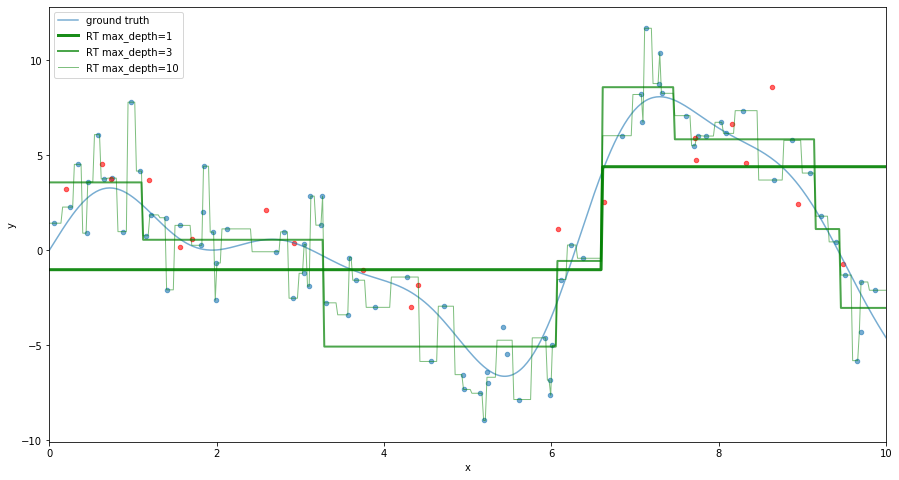

In [3]:
plot_data()

est = DecisionTreeRegressor(max_depth=1).fit(X_train, y_train)
x_pred_1 = est.predict(x_plot.reshape(-1,1))
plt.plot(x_plot, x_pred_1, label='RT max_depth=1', 
         color='g', alpha=0.9, linewidth=3)

est = DecisionTreeRegressor(max_depth=3).fit(X_train, y_train)
plt.plot(x_plot, est.predict(x_plot.reshape(-1,1)),
         label='RT max_depth=3', color='g', alpha=0.7, linewidth=2)

est = DecisionTreeRegressor(max_depth=10).fit(X_train, y_train)
plt.plot(x_plot, est.predict(x_plot.reshape(-1,1)),
         label='RT max_depth=10', color='g', alpha=0.5, linewidth=1)


plt.legend(loc='upper left')

### Random Forest

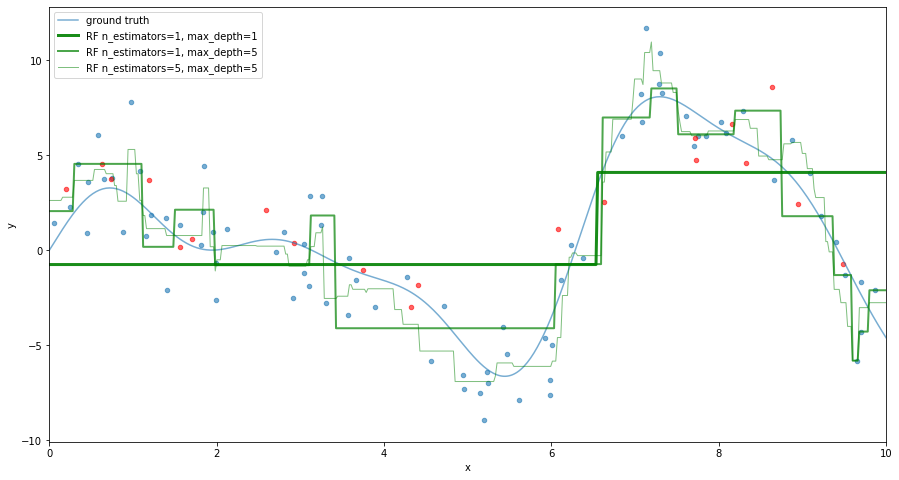

In [4]:
plot_data()

est = RandomForestRegressor(n_estimators=1, max_depth=1).fit(X_train, y_train)
plt.plot(x_plot, est.predict(x_plot[:, np.newaxis]), label='RF n_estimators=1, max_depth=1', color='g', alpha=0.9, linewidth=3)

est = RandomForestRegressor(n_estimators=1, max_depth=5).fit(X_train, y_train)
plt.plot(x_plot, est.predict(x_plot[:, np.newaxis]), label='RF n_estimators=1, max_depth=5', color='g', alpha=0.7, linewidth=2)

est = RandomForestRegressor(n_estimators=5, max_depth=5).fit(X_train, y_train)
plt.plot(x_plot, est.predict(x_plot[:, np.newaxis]), label='RF n_estimators=5, max_depth=5', color='g', alpha=0.5, linewidth=1)


plt.legend(loc='upper left')

### Gradient boosting

[23:10:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:10:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:10:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


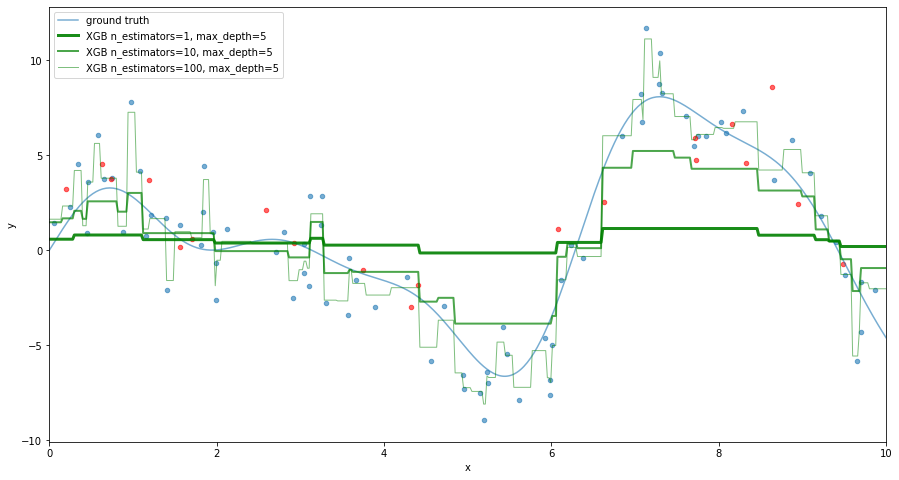

In [5]:
plot_data()

est = XGBRegressor(n_estimators=1, max_depth=5).fit(X_train, y_train)
plt.plot(x_plot, est.predict(x_plot[:, np.newaxis]), label='XGB n_estimators=1, max_depth=5', color='g', alpha=0.9, linewidth=3)

est = XGBRegressor(n_estimators=10, max_depth=5).fit(X_train, y_train)
plt.plot(x_plot, est.predict(x_plot[:, np.newaxis]), label='XGB n_estimators=10, max_depth=5', color='g', alpha=0.7, linewidth=2)

est = XGBRegressor(n_estimators=100, max_depth=5).fit(X_train, y_train)
plt.plot(x_plot, est.predict(x_plot[:, np.newaxis]), label='XGB n_estimators=100, max_depth=5', color='g', alpha=0.5, linewidth=1)


plt.legend(loc='upper left')

In [6]:
%matplotlib inline
import matplotlib as mpl
from ipywidgets import interact, IntSlider, FloatSlider

n_estimators_slider = IntSlider(min=1, max=1000, step=20, value=30)
max_depth_slider = IntSlider(min=1, max=15, step=1, value=3)
learning_rate_slider = FloatSlider(min=0.01, max=0.3, step=0.01, value=0.1)
subsample_slider = FloatSlider(min=0.1, max=1, step=0.1, value=1.0)


@interact(n_estimators=n_estimators_slider, 
          max_depth=max_depth_slider, 
          learning_rate=learning_rate_slider,\
         subsample=subsample_slider)


def plot(n_estimators, max_depth, learning_rate, subsample):
    est = XGBRegressor(n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate, \
                           subsample=subsample).fit(X_train, y_train)

    plot_data()
    plt.plot(x_plot, est.predict(x_plot[:, np.newaxis]), \
             label='XGB n_estimators={0}, max_depth={1}, learning_rate={2}, subsample={3}'.format(n_estimators, max_depth, learning_rate, subsample),\
             color='g', alpha=0.9, linewidth=3)
    
    plt.legend(loc='upper left')

interactive(children=(IntSlider(value=30, description='n_estimators', max=1000, min=1, step=20), IntSlider(val…